In [1]:

import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score, accuracy_score
import string 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jack\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


turning all uppercase to lower


In [2]:
creat_sentance = WordNetLemmatizer()

In [3]:
 # fix_word help removing single charater value, then turning them of to lower case and slit
 # then it removes stopwords, and also use lemmatize to break the sentance and rejoin them 
def fix_word(comment):
    
    nword = re.sub(r"[^a-zA-Z]", " ", comment)  
    nword = nword.lower() 
    nword = nword.split()
    final_word = [i for i in nword if i not in stopwords.words('english')]
    final_sentence = [creat_sentance.lemmatize(z) for z in final_word]
    final_sentence = ' '.join(final_sentence)
    return final_sentence

In [4]:
dataset = pd.read_csv('first-gop-debate.csv')

dataset = shuffle(dataset)
dataset.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 12926: invalid start byte

In [ ]:
x = dataset.text.apply(fix_word)
y = dataset['sentiment']
print(y)

6628     Negative
11814    Positive
4397     Negative
5315     Positive
9049     Negative
           ...   
10477    Positive
11789    Positive
6424     Negative
5208     Negative
8315     Positive
Name: sentiment, Length: 13871, dtype: object


In [ ]:
vectorizer=CountVectorizer() #Encode as integers to be used for the algorithm
x_vectorized=vectorizer.fit_transform(x) #Learn the vocabulary dictionary and return document-term matrix.

In [ ]:
#Split between train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_vectorized, y, test_size=0.3, random_state=0)


In [ ]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train, y_train)
prediction1=dt.predict(x_test)

In [ ]:
#K Neighbors Classifer
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
prediction2=KNN.predict(x_test)

In [ ]:
#Multi-layer perceptron Classifier
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(x_train, y_train)
prediction3=NN.predict(x_test)

print(prediction3)

['Negative' 'Negative' 'Positive' ... 'Positive' 'Neutral' 'Positive']


/Users/johnle/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
'''
#Hyperparameter Tuning
parameter={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
NN=GridSearchCV(NN, parameter, n_jobs=1, cv=5)
NN.fit(x_train, y_train)
NN=NN.best_estimator_
prediction3=NN.predict(x_test)
'''

"\n#Hyperparameter Tuning\nparameter={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}\nNN=GridSearchCV(NN, parameter, n_jobs=1, cv=5)\nNN.fit(x_train, y_train)\nNN=NN.best_estimator_\nprediction3=NN.predict(x_test)\n"

Text(0.5, 1.0, 'Decision Tree - Accuracy Score: 0.636')

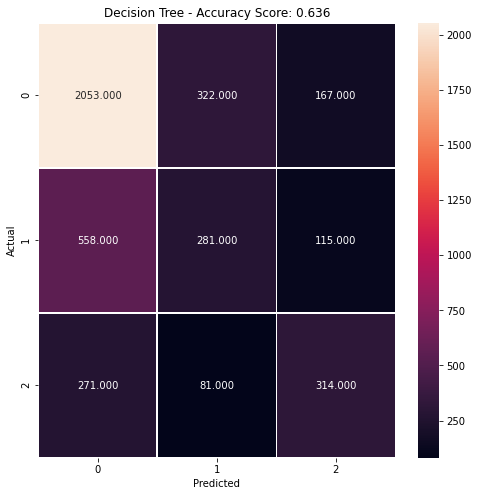

In [ ]:
#Measure performance using Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm1=metrics.confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Decision Tree - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction1)
plt.title(title, size=12)


Text(0.5, 1.0, 'K Neighbors Classifier - Accuracy Score: 0.636')

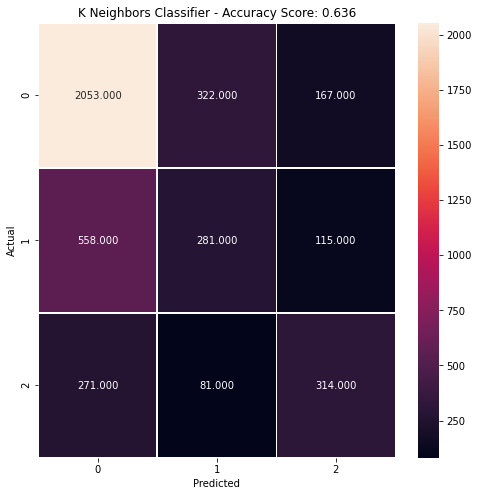

In [ ]:
cm2=metrics.confusion_matrix(y_test, prediction2)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='K Neighbors Classifier - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction1)
plt.title(title, size=12)


Text(0.5, 1.0, 'Neural Network - Accuracy Score: 0.640')

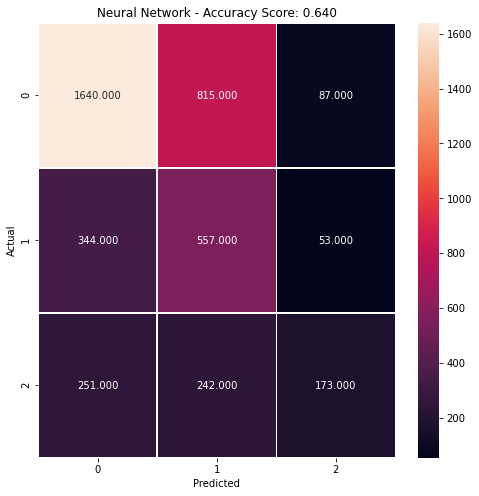

In [ ]:
cm3=metrics.confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8,8))
sns.heatmap(cm2, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Neural Network - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction3)
plt.title(title, size=12)